In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/performance-evaluation/performance_evaluation - performance_evaluation.csv (1).csv
/kaggle/input/passages1/bbc-news-data.csv


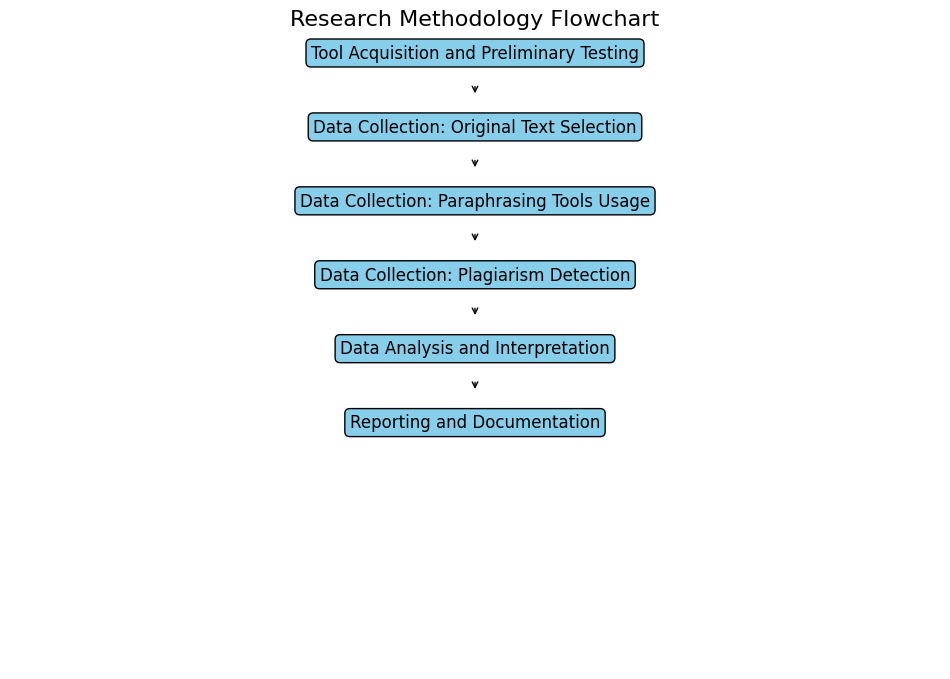

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


steps = [
    "Tool Acquisition and Preliminary Testing",
    "Data Collection: Original Text Selection",
    "Data Collection: Paraphrasing Tools Usage",
    "Data Collection: Plagiarism Detection",
    "Data Analysis and Interpretation",
    "Reporting and Documentation"
]


fig, ax = plt.subplots(figsize=(12, 8))


for i, step in enumerate(steps):
    ax.text(0.5, 1 - i * 0.12, step, ha='center', va='center', fontsize=12,
            bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="skyblue"))


for i in range(len(steps) - 1):
    ax.annotate("", xy=(0.5, 1 - (i + 1) * 0.12 + 0.05), xytext=(0.5, 1 - i * 0.12 - 0.05),
                arrowprops=dict(arrowstyle="->", color='black'))


ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

# Add a title
plt.title("Research Methodology Flowchart", fontsize=16, pad=20)

# Save the figure
plt.savefig("Research_Methodology_Flowchart.png")

# Show the plot
plt.show()


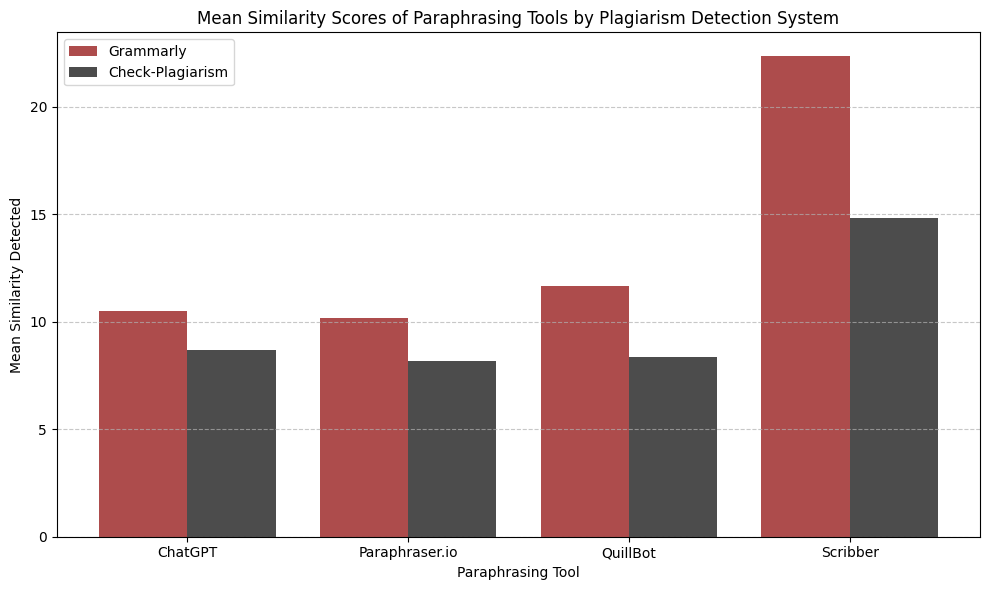

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/kaggle/input/performance-evaluation/performance_evaluation - performance_evaluation.csv (1).csv')
df_grammarly = df[df['Plagiarism Detection System'] == 'Grammarly']
df_check_plagiarism = df[df['Plagiarism Detection System'] == 'Check-Plagiarism']
mean_grammarly = df_grammarly.groupby('Paraphrasing Tool')['Similarity Detected'].mean()
mean_check_plagiarism = df_check_plagiarism.groupby('Paraphrasing Tool')['Similarity Detected'].mean()
mean_scores = pd.DataFrame({
    'Grammarly': mean_grammarly,
    'Check-Plagiarism': mean_check_plagiarism
}).reset_index()
pos = list(range(len(mean_scores['Paraphrasing Tool'])))
width = 0.4
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(pos, mean_scores['Grammarly'], width, alpha=0.7, color='darkred', label='Grammarly')
plt.bar([p + width for p in pos], mean_scores['Check-Plagiarism'], width, alpha=0.7, color='black', label='Check-Plagiarism')
ax.set_xlabel('Paraphrasing Tool')
ax.set_ylabel('Mean Similarity Detected')
ax.set_title('Mean Similarity Scores of Paraphrasing Tools by Plagiarism Detection System')
ax.set_xticks([p + width / 2 for p in pos])
ax.set_xticklabels(mean_scores['Paraphrasing Tool'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(['Grammarly', 'Check-Plagiarism'], loc='upper left')
plt.tight_layout()
plt.show()


Index(['Passage', 'Original Passage', 'Paraphrased Passage',
       'Paraphrasing Tool', 'Plagiarism Detection System',
       'Similarity Detected'],
      dtype='object')


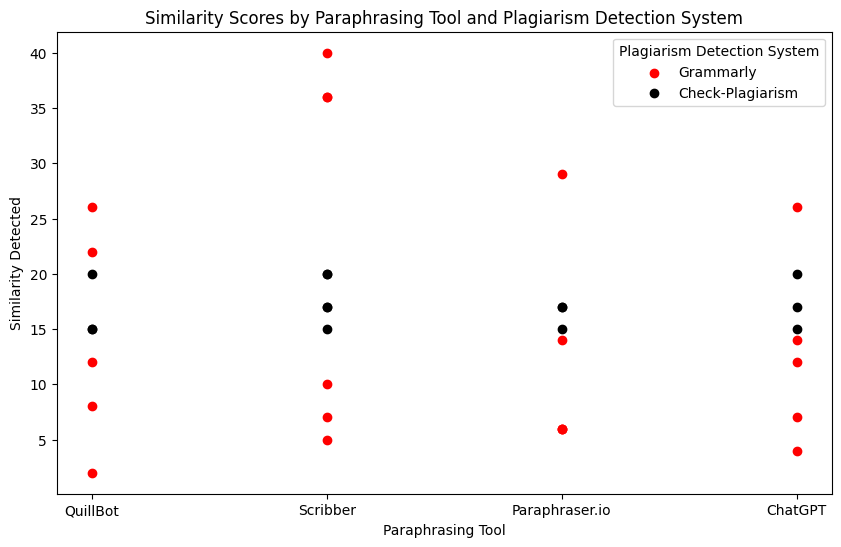

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
dataset_path = '/kaggle/input/performance-evaluation/performance_evaluation - performance_evaluation.csv (1).csv'
df = pd.read_csv(dataset_path)
print(df.columns)
df.columns = df.columns.str.strip()
df.columns = ['Passage', 'Original Passage', 'Paraphrased Passage', 'Paraphrasing Tool', 'To Plagiarism Detection System', 'Similarity Detected']
df_filtered = df[df['Similarity Detected'] > 0]
plt.figure(figsize=(10, 6))
colors = {'Grammarly': 'red', 'Check-Plagiarism': 'black'}
for system in df_filtered['To Plagiarism Detection System'].unique():
    plt.scatter(df_filtered[df_filtered['To Plagiarism Detection System'] == system]['Paraphrasing Tool'],
                df_filtered[df_filtered['To Plagiarism Detection System'] == system]['Similarity Detected'],
                color=colors[system], label=system)
plt.xlabel('Paraphrasing Tool')
plt.ylabel('Similarity Detected')
plt.title('Similarity Scores by Paraphrasing Tool and Plagiarism Detection System')
plt.legend(title='Plagiarism Detection System')
plt.show()


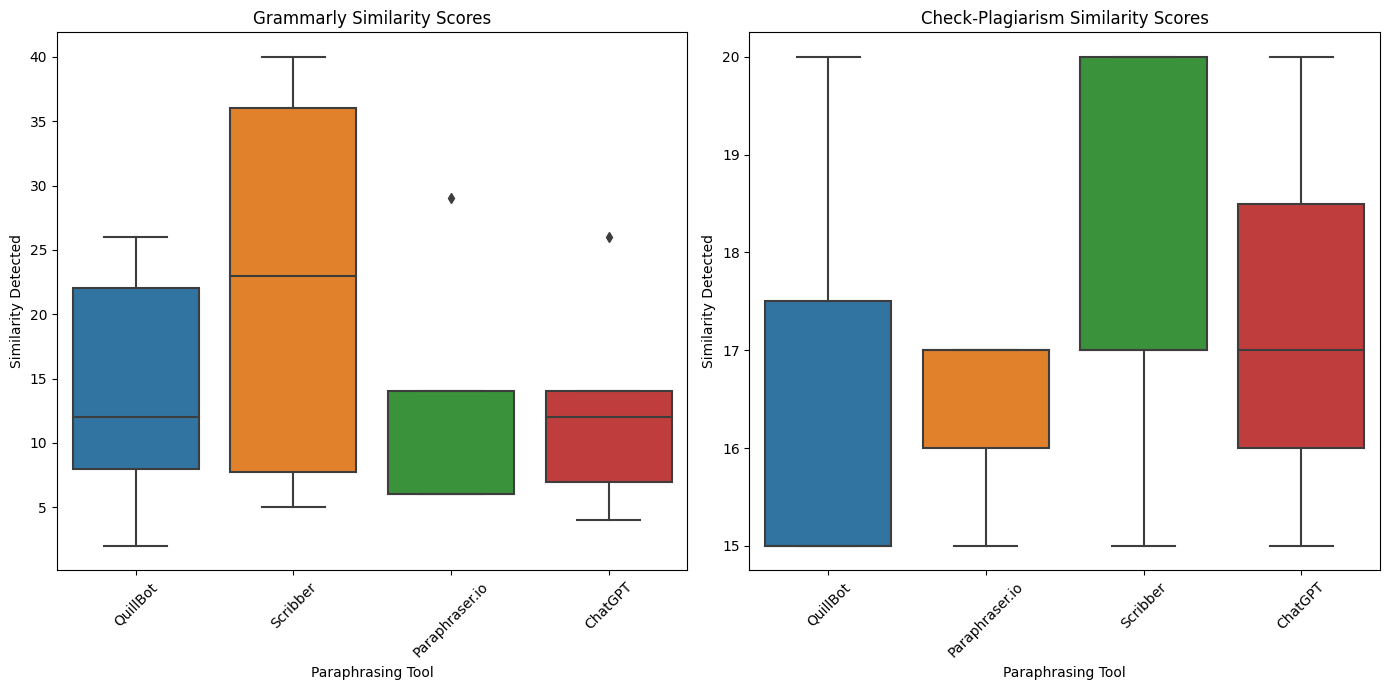

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dataset_path = '/kaggle/input/performance-evaluation/performance_evaluation - performance_evaluation.csv (1).csv'
df = pd.read_csv(dataset_path)
df_filtered = df[(df['Similarity Detected'] > 0)]
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.boxplot(x='Paraphrasing Tool', y='Similarity Detected', data=df_filtered[df_filtered['Plagiarism Detection System'] == 'Grammarly'])
plt.title('Grammarly Similarity Scores')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
sns.boxplot(x='Paraphrasing Tool', y='Similarity Detected', data=df_filtered[df_filtered['Plagiarism Detection System'] == 'Check-Plagiarism'])
plt.title('Check-Plagiarism Similarity Scores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
import pandas as pd
dataset_path = '/kaggle/input/performance-evaluation/performance_evaluation - performance_evaluation.csv (1).csv'
df = pd.read_csv(dataset_path)
zero_similarity_counts = df[df['Similarity Detected'] == 0].groupby(['Paraphrasing Tool', 'Plagiarism Detection System']).size().reset_index(name='Zero Similarity Count')
print(zero_similarity_counts)


  Paraphrasing Tool Plagiarism Detection System  Zero Similarity Count
0           ChatGPT            Check-Plagiarism                      3
1           ChatGPT                   Grammarly                      1
2    Paraphraser.io            Check-Plagiarism                      3
3    Paraphraser.io                   Grammarly                      1
4          QuillBot            Check-Plagiarism                      3
5          QuillBot                   Grammarly                      1
6          Scribber            Check-Plagiarism                      1


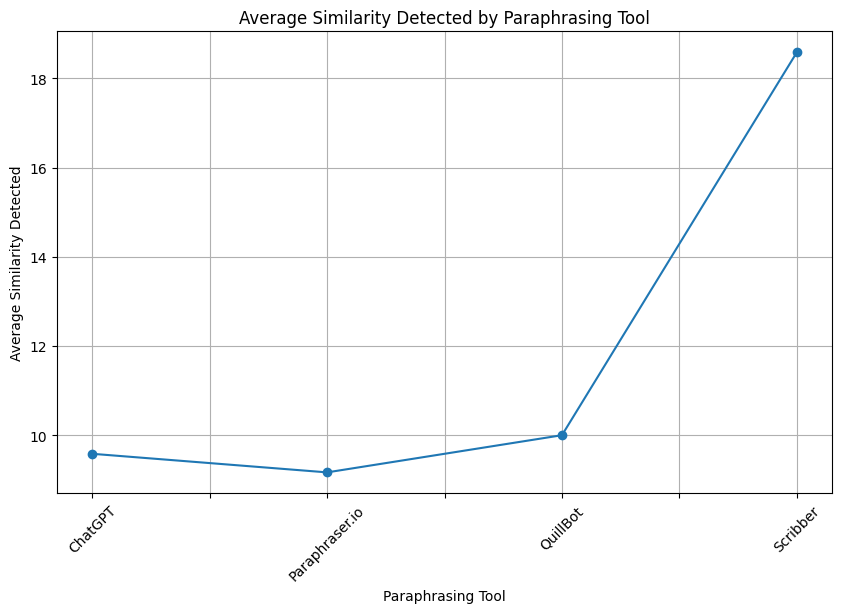

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
dataset_path = '/kaggle/input/performance-evaluation/performance_evaluation - performance_evaluation.csv (1).csv'
df = pd.read_csv(dataset_path)
average_similarity = df.groupby('Paraphrasing Tool')['Similarity Detected'].mean()
plt.figure(figsize=(10, 6))
average_similarity.plot(kind='line', marker='o')
plt.title('Average Similarity Detected by Paraphrasing Tool')
plt.xlabel('Paraphrasing Tool')
plt.ylabel('Average Similarity Detected')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate labels if necessary
plt.show()


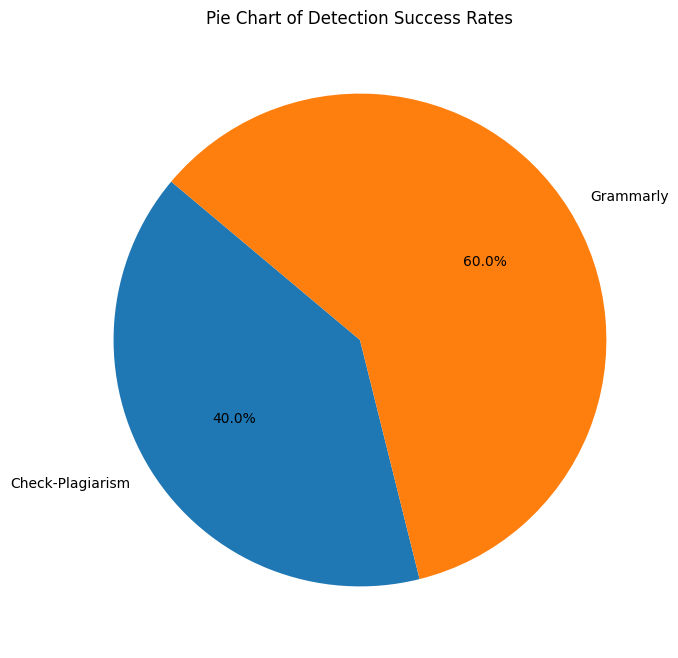

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
dataset_path = '/kaggle/input/performance-evaluation/performance_evaluation - performance_evaluation.csv (1).csv'
df = pd.read_csv(dataset_path)
success_threshold = 0.1
df['Success'] = df['Similarity Detected'] >= success_threshold
success_rates = df.groupby('Plagiarism Detection System')['Success'].mean()
plt.figure(figsize=(8, 8))
plt.pie(success_rates, labels=success_rates.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Detection Success Rates')
plt.show()


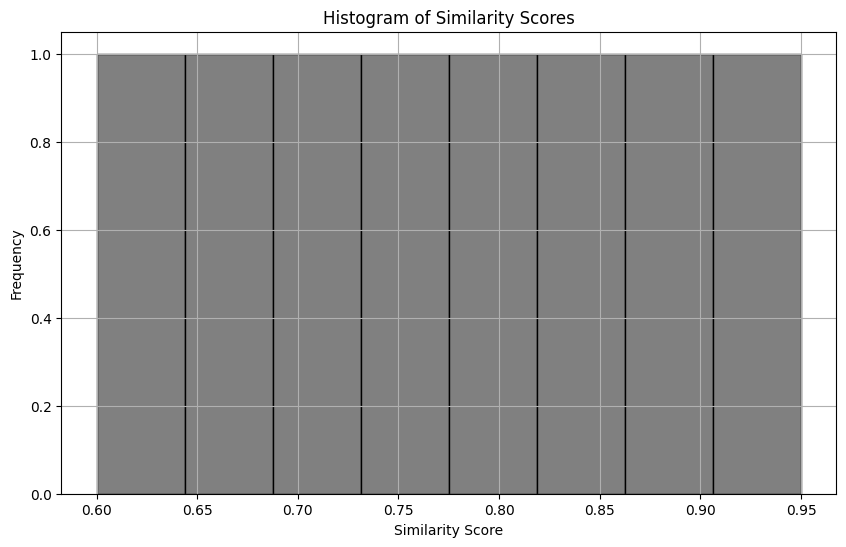